## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

However, feel free to write code that prints output and then hide the code using the *yaml* setting as shown in an example below *(in the EDA section)*

**Delete this section from the report, when using this template.** 

## Background / Motivation

The film industry is a dynamic landscape where many movies are produced and released each year. However, not all films achieve financial success or resonate with audiences. The ability to accurately predict a movie's revenue potential before its release can be extremely valuable to filmmakers, investors, and screenwriters, allowing them to make informed decisions and allocate resources such as time and money more effectively.

The predictors considered in this data science project, such as genre, budget, language, and release date, are key factors that influence a movie's success. Genre plays a role in attracting specific audiences, while budget reflects the financial investment and production values associated with a film. Language can determine the film's potential global reach and release date affects competition between movies for capturing audiences. Ultimately, the motivation behind this data science project was to use movie data and predictive analytics to enhance decision-making in the film industry, offering a more systematic and evidence-based approach to assessing a movie's revenue potential. 


## Problem statement 

Traditionally, the decision-making process in the film industry has been heavily reliant on subjective judgments, making it inherently risky. However, the rise of big data and data science has the potential to revolutionize this approach. With the proliferation of digital platforms and online ticket sales, an enormous amount of data is generated, capturing various attributes of movies.

The primary objective of this project was to develop a model that could accurately determine whether a movie would generate revenue based on a variety of different attributes related to the movie itself. As part of this process in developing a predictive model, one secondary objective was to identify the factors that had the greatest impact on a movie generating revenue. By attaining both of these goals, recommendations could be made to major players in the film industry to improve decision making and movie selection.


## Data sources

The data used was a Kaggle dataset originally from the Full MovieLens Dataset released in July 2017. The dataset includes about 45,000 movies all released before July 2017 along with relevant attributes of these movies such as their budgets, genres, language, and release date. In addition, the dataset has 26 million ratings from around 270,000 people on all of the movies. This data was extracted from the website GroupLens (grouplens.org). 

https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv


## Stakeholders

As discussed in our problem statement, there are many relevant stakeholders interested in the ability to predict a movie's profitability before the actual release of the film.  
1. Movie Studios: If a movie studio is able to utilize our model to predict the profitability of a movie from only a few characteristics such as genre, runtime, and language, movie studios will be able to optimize for those types of movies; thus, choosing to work on the movies that will make them profit.  
2. Actors/Actress: When selecting which movies to act in, our model will allow actors/actress to determine which movies have the most profitable structure (relevant genres/runtime/language/etc...) and; thus, which movies will best further their career and notority in the film industry.  
3. Screenwriters: With our model, a screenwriter will be able to better understand the percevied profitability of their movie. By optimizing their scripts to befit our model, the movies written by a screenwriter are much more likely to be picked up by movie studios and further a screenwriter's career.  

## Data quality check / cleaning / preparation 

Because the question we are trying to answer is a classification problem, we had to rework the structure of the response and some of the variables. For example, instead of looking at how much revenue each movie produced, we are predicting whether a movie produced revenue or not. To effectively do this, we changed `revenue` from a continuous variable to a categorical, binary response. We did this for a few of the predictors as well in order to better understand the relationships between the predictors and the response. After parsing through the data, we did not identify any observations that appeared to have incorrect values. While there were a large amount of missing values for `belongs_to_collection`, we identified that a missing value in this column represented a movie that did not belong to a collection. We changed this predictor into a binary variable to fix this issue. There were very few true missing values, and we decided to drop them because they would have been very difficult to impute correctly. For example, it is impossible to come up with a formula to impute missing release dates of movies based on the information of other movies. We decided that dropping these predictions would have a better result on our predictions than trying to impute these values, especially since these observations were a very small portion of the total data. 

In [45]:
## | echo: false
#| warning: false
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('movies_classification_updated.csv', index_col = 'Unnamed: 0')
data_raw = pd.read_csv('movies_metadata.csv')

C:\Users\csky2\AppData\Local\Temp\ipykernel_25244\2780617125.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('movies_metadata.csv')


Distribution of Response (original data):

In [ ]:
#| echo: false

data_raw.describe()[['revenue']]

,revenue
count,4.546000e+04
mean,1.120935e+07
std,6.433225e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.787965e+09


Distribution of Response (cleaned data):

In [ ]:
#| echo: false
pd.DataFrame(data.revenue.value_counts()/data.shape[0])

,revenue
0.0,0.834683
1.0,0.165317


#### Distribution of predictors (original data):
Missing Values (original data):

In [ ]:
#| echo: false
data_raw_predictors = data_raw.drop(['revenue', 'adult', 'homepage', 'id', 'imdb_id', 'original_title', 'poster_path', 'status', 'video', 'overview', 'production_companies', 'production_countries', 'spoken_languages', 'tagline', 'popularity', 'vote_average', 'vote_count', 'title'], axis=1)
isna_preds_raw = data_raw_predictors.isna().sum()
nunique_preds_raw = data_raw_predictors.nunique()
pd.DataFrame({'Missing Values Totals': isna_preds_raw,
             'Unique Values Totals': nunique_preds_raw})

,Missing Values Totals,Unique Values Totals
belongs_to_collection,40972,1698
budget,0,1226
genres,0,4069
original_language,11,92
release_date,87,17336
runtime,263,353


Frequency of Predictors (original data):

In [ ]:
#| echo: false
#| results-fold: true
frequencies = []
for col in data_raw_predictors.columns:
    for num in range(0, 3):
        a = str(data_raw_predictors[col].value_counts().index[num])
        b = str(data_raw_predictors[col].value_counts()[num])
        holder = [a, b]
        frequencies.append(holder)
        
df_freq = pd.DataFrame(frequencies,index = [['belongs_to_collection']*3+['budget']*3+['genres']*3+['original_language']*3+['release_date']*3+['runtime']*3,
                                      ['','','',
                                       '','','',
                                      '','','',
                                      '','','',
                                      '','','',
                                      '','','']],
                    columns = ['Top Levels','Frequency'])
df_freq

Top Levels  \
belongs_to_collection   {'id': 415931, 'name': 'The Bowery Boys', 'pos...   
                        {'id': 421566, 'name': 'Totò Collection', 'pos...   
                        {'id': 645, 'name': 'James Bond Collection', '...   
budget                                                                  0   
                                                                  5000000   
                                                                 10000000   
genres                                      [{'id': 18, 'name': 'Drama'}]   
                                           [{'id': 35, 'name': 'Comedy'}]   
                                      [{'id': 99, 'name': 'Documentary'}]   
original_language                                                      en   
                                                                       fr   
                                                                       it   
release_date                                                   2008-01-01   
                                                               2009-01-01   
                                                               2007-01-01   
runtime                                                              90.0   
                                                                      0.0   
                                                                    100.0   

                       Frequency  
belongs_to_collection         29  
                              27  
                              26  
budget                     36573  
                             286  
                             259  
genres                      5000  
                            3621  
                            2723  
original_language          32269  
                            2438  
                            1529  
release_date                 136  
                             121  
                             118  
runtime                     1558  
                             107  
                              33

*(See project code for the frecuency of levels table for the cleaned data)*

## Exploratory data analysis

Movies with larger budgets seemed to have a better chance of making a profit than movies with smaller budgets. Movies with shorter run times seemed to have a better chance of making a profit. These two predictors were identified as having high importances by some of our individual models. These relationships were helpful to recognize that these predictors were potentially more influential than others in our models.

<Axes: xlabel='runtime', ylabel='revenue'>

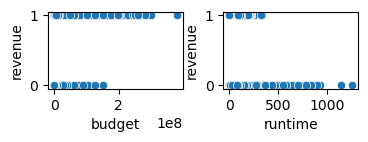

In [47]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (4,1))
plt.subplots_adjust(wspace = 0.3)
sns.scatterplot(ax = axes[0], x = data.budget, y = data.revenue)
sns.scatterplot(ax = axes[1], x = data.runtime, y = data.revenue)

While most genres generally had more movies that produced revenue, there were a few expections.
# add why this is useful

<Axes: xlabel='TV Movie', ylabel='revenue'>

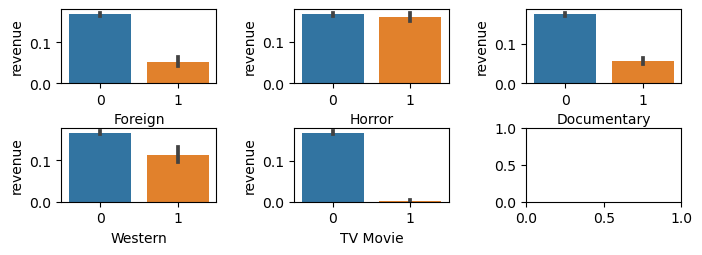

In [53]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (8,2.5))
plt.subplots_adjust(wspace = 0.5, hspace = 0.6)

sns.barplot(ax = axes[0,0], x = data.Foreign, y = data.revenue)
sns.barplot(ax = axes[0,1], x = data.Horror, y = data.revenue)
sns.barplot(ax = axes[0,2], x = data.Documentary, y = data.revenue)
sns.barplot(ax = axes[1,0], x = data.Western, y = data.revenue)
sns.barplot(ax = axes[1,1], x = data['TV Movie'], y = data.revenue)

## Approach

Models:  
1. Basic: AdaBoostClassification(), DecisionTreeClassifier(), XGBoostClassifier(), RandomForestClassifier()  
2. Ensembles: (Hard) VotingRegressor(), StackingRegressor()  

With our model choices, we hoped to develop a deep and varied selection of models for ultimate ensembles. In these models, we optimized for both accuracy and precision. This was because, for our stakeholders, predicting a movie to be profitable when it is not it much more devastating than predicting a movie to not be profitable while it actually is. By optimizing accuracy and prediction, we ensure our model's election of the positive class (a movie being profitable) is trustworthy. Our approach is very traditional, focusing on EDA insights and hyperparameter tunings to optimize our models. With a plentiful data source and direct approach, we did not anticipate many issues with our model creation. As anticipated, we did not run into many issues during the creation of our model; however, we did run into many unanticipated outcomes, primarily, the models that we believed would be successful and those that actually found success. Our problem did not have any prior solutions. We did not utilize any code repositories.   

## Developing the model: Hyperparameter tuning

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score,train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
import itertools as it
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier

import itertools as it

#Libraries for visualizing trees
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import time as time

In [5]:
# separating predictors and response
y = data.revenue
X = data.drop(['revenue', 'title'], axis = 1)

# creating test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 45)

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### RandomForest
*By Elijah Nacar*

To begin, I split the data into a train/testing split and scaled/imputed the data. I began with the parameter grid shown below and found great success with a model accuracy of ~87.56% and a model precision of ~66.48%. 

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer

data = pd.read_csv('movies_classification_updated.csv')
data.drop(['Unnamed: 0' , 'title'], axis=1, inplace=True)
data.head()

X = data.drop('revenue', axis=1)
y = data.revenue

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [9]:
params = {'n_estimators': [2000],
          'max_features': [.5, 0.75, 1],
          'max_depth': [5, 10, 15],
          'min_samples_split': [2, 5, 8, 10],
          'max_leaf_nodes': [20, 30, 45]
         }

param_list=list(it.product(*(params[Name] for Name in list(params.keys()))))
oob_recall = [0]*len(param_list)

i=0
for pr in param_list:
    model = RandomForestClassifier(random_state=1,oob_score=True,verbose=False,n_estimators = pr[0],
                                  max_features=pr[1], n_jobs=-1).fit(X_train_imputed,y_train)
    
    oob_pred = (model.oob_decision_function_[:,1]>=0.5).astype(int)     
    oob_recall[i] = precision_score(y_train, oob_pred)
    i=i+1
    
print("params= ", param_list[np.argmax(oob_recall)])

params=  (2000, 1, 15, 2, 45)


After this initial tuning, I noticed that both max_depth and max_leaf_nodes selected the highest value possible for their hyperparameter. I chose to tune these parameters further as I believed it would be the most beneficial way to improve the model with only an assignment's-worth of time. 

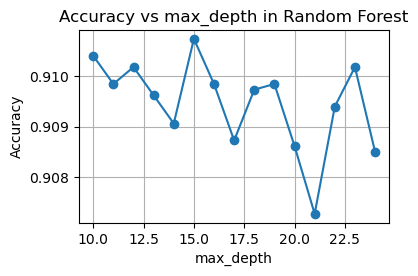

In [63]:
# Define the values of max_depth to explore
max_depth_values = range(10, 25)

# Train random forest models with different max_depth values
accuracies = []
for max_depth in max_depth_values:
    rf = RandomForestClassifier(random_state=1, max_depth=max_depth)
    rf.fit(X_train_imputed, y_train)
    accuracy = rf.score(X_test_imputed, y_test)
    accuracies.append(accuracy)
    
# Plot the max_depth values vs accuracies
plt.figure(figsize=(4, 2.5))
plt.plot(max_depth_values, accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth in Random Forest')
plt.grid(True)
plt.show()

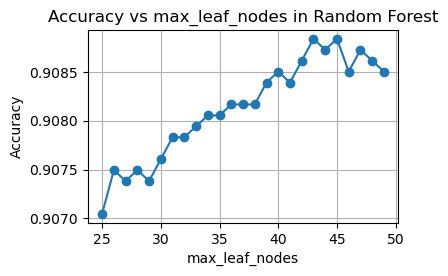

In [64]:
# Define the values of max_leaf_nodes to explore
max_leaf_nodes_values = range(25, 50)  

# Train random forest models with different max_leaf_nodes values
accuracies = []
for max_leaf_nodes in max_leaf_nodes_values:
    rf = RandomForestClassifier(random_state=1, max_leaf_nodes=max_leaf_nodes)
    rf.fit(X_train_imputed, y_train)
    accuracy = rf.score(X_test_imputed, y_test)
    accuracies.append(accuracy)

# Plot the max_leaf_nodes values vs accuracies
plt.figure(figsize=(4, 2.5))
plt.plot(max_leaf_nodes_values, accuracies, marker='o')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_leaf_nodes in Random Forest')
plt.grid(True)
plt.show()

I then used the new hyperparameters found by using this approach (max_depth = 15 | max_leaf_nodes = 45) to tune the decision threshold probability. With a decision threshold of 0.38, my model was able to achieve an accuracy of ~86.09% and a precision ~91.54%. A slight decrease in a accuracy for a massive increase in precision.

Accuracy:  86.08501118568232
Precision:  0.9154929577464789


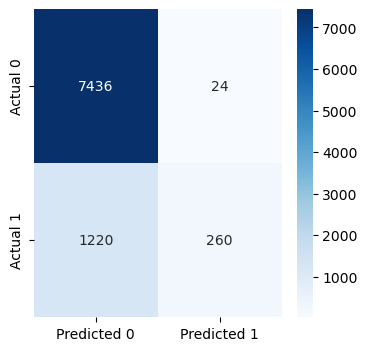

In [21]:
model = RandomForestClassifier(random_state=1, max_features=1, n_estimators = 2000, 
                               oob_score=True, max_depth = 15, max_leaf_nodes = 45, min_samples_split=2).fit(X_train_imputed, y_train)

# Tuned Decision Threshold and got 0.39

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.39

y_pred_prob = model.predict_proba(X_test_imputed)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(ax=ax, data=cm, annot=True, cmap='Blues', fmt='g');

### AdaBoost 
*By Jack McNally*

In [15]:
#| warning: false
#Tuning the hyperparameters of the AdaBoost model with a coarse search
model = AdaBoostRegressor(random_state=1)
grid = dict()
grid['n_estimators'] = range(1, 200, 50) 
grid['learning_rate'] = [0.01,0.1, 1.0]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=25), 
                          DecisionTreeClassifier(max_depth=100)]

# define the evaluation procedure
cv = KFold(n_splits=2, shuffle=True, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision')

# execute the grid search
grid_result = grid_search.fit(X_train, y_train)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.806693 using {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 1}


C:\Users\csky2\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Text(0.5, 0, 'Number of trees')

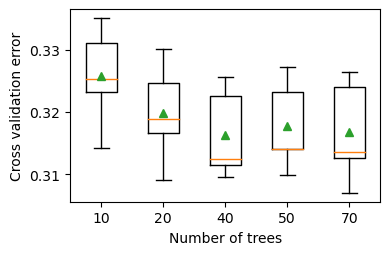

In [62]:
#Tuning only the number of trees in the model
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 20, 40, 50, 70]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    # define the evaluation procedure
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    #print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(4, 2.5))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=10)
plt.xlabel('Number of trees',fontsize=10)

Text(0.5, 0, 'Depth of each tree')

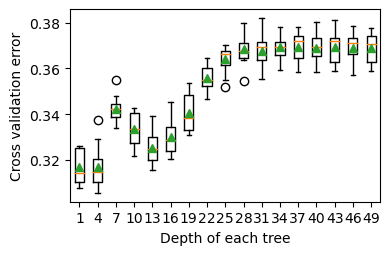

In [61]:
# Tuning only the depth of the model
def get_models():
    models = dict()
    n_depth = range(1, 50, 3)
    for n in n_depth:
        # define base model
        base = DecisionTreeClassifier(max_depth=n)
        # define ensemble model
        models[str(n)] = AdaBoostClassifier(base_estimator=base,n_estimators=50)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    #print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.figure(figsize=(4, 2.5))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=10)
plt.xlabel('Depth of each tree',fontsize=10)

Text(0.5, 0, 'Learning rate')

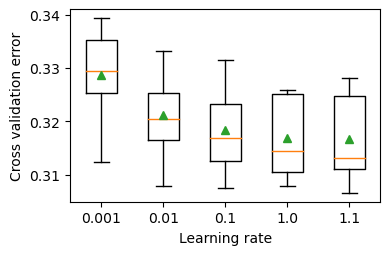

In [60]:
#Tuning only the learning rate of the model
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    n_rate = [0.001, 0.01, 0.1, 1.0, 1.1]
    for n in n_rate:
        models[n] = AdaBoostClassifier(learning_rate=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    #print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(4, 2.5))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=10)
plt.xlabel('Learning rate',fontsize=10)

In [25]:
#| warning: false
#More specifically tuning the hyperparameters of the model
model = AdaBoostClassifier(random_state=1)
grid = dict()
grid['n_estimators'] = [25, 50, 70]
grid['learning_rate'] = [0.001, 0.01, 0.1, 1]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=4), 
                          DecisionTreeClassifier(max_depth=6)]

# define the evaluation procedure
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision')

# execute the grid search
grid_result = grid_search.fit(X_train, y_train)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

C:\Users\csky2\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best: 0.798358 using {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.001, 'n_estimators': 25}


In [26]:
#Model with most optimal hyperparameters
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), random_state=1,n_estimators=25,learning_rate = 0.001).fit(X_train,y_train)


For hyperparameter tuning, I first started with a coare search to get a foundational understanding of what hyperparameters would be most optimal. I then proceeded to tune the number of trees, the depth of the model, and the learning rates individually. I took this approach as the computational time was significantly less, while also allowing me to fine tune one parameter at a time. After finding the optimal values for each hyperparameter, I then performed a fine tuned search where each range of values considered surrounded the optimal values I had previously found. I took this approach so that my grid search could find the best hyperparameter combinations when considered in unison. After this fine tuned search, I felt confident about my results as minor changes to the parameters did not improve my precision accuracy. 

### Decision Tree
*By Tess Wagner*

In [6]:
# making base model to find the range of hyperparameters
model_base = DecisionTreeClassifier(random_state = 1)
model_base.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [8]:
# accuracy/recall/precision without tuning
cross_val_ypred = cross_val_predict(model_base, X_train, y_train, cv = 5, method = 'predict_proba')
y_pred = cross_val_ypred[:,1] > 0.5
y_pred = y_pred.astype(int)
print("Accuracy: ",accuracy_score(y_pred, y_train))
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

Accuracy:  0.8502069582727374
Precision:  0.5462889697736983
Recall:  0.5810469617909443


In [9]:
# finding range of hyperparameters
print("Maximum tree depth =", model_base.get_depth())
print("Maximum leaves =", model_base.get_n_leaves())

Maximum tree depth = 34
Maximum leaves = 4737


In [10]:
# coarse grid search
parameters = {'max_depth':range(2,34, 5),
              'max_leaf_nodes':range(2, 4737, 100), 
              'max_features': range(1, 26, 5)}

cv = StratifiedKFold(n_splits = 5,shuffle=True,random_state=1)

grid_result = GridSearchCV(DecisionTreeClassifier(random_state=1), parameters, n_jobs=-1,verbose=1,cv=cv,
                    scoring='precision')

grid_result.fit(X_train, y_train)

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(2, 34, 5),
                         'max_features': range(1, 26, 5),
                         'max_leaf_nodes': range(2, 4737, 100)},
             scoring='precision', verbose=1)

In [11]:
# best results in the grid search
print(grid_result.best_score_, grid_result.best_params_) 

0.7774043203107854 {'max_depth': 7, 'max_features': 16, 'max_leaf_nodes': 102}


After the original grid search, I did a finer grid search based on the top combinations of values returned by the original grid search. I chose to do another grid search because the original range of values was very wide, and I thought I would try to get a higher training precision.

In [12]:
# finer grid search
parameters = {'max_depth':range(7,17, 2),
              'max_leaf_nodes':range(90, 300, 25), 
              'max_features': range(16, 29, 2)}

cv = KFold(n_splits = 5,shuffle=True,random_state=1)

grid_result = GridSearchCV(DecisionTreeClassifier(random_state=1), parameters, n_jobs=-1,verbose=1,cv=cv,
                    scoring='precision')

grid_result.fit(X_train, y_train)

Fitting 5 folds for each of 315 candidates, totalling 1575 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(7, 17, 2),
                         'max_features': range(16, 29, 2),
                         'max_leaf_nodes': range(90, 300, 25)},
             scoring='precision', verbose=1)

In [13]:
# best results in the grid search
print (grid_result.best_score_, grid_result.best_params_) 

0.7836584372111675 {'max_depth': 9, 'max_features': 20, 'max_leaf_nodes': 140}


In [31]:
# training the model with the best results
model = DecisionTreeClassifier(random_state = 1, max_depth= 9, max_features = 20, max_leaf_nodes = 140)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, max_features=20, max_leaf_nodes=140,
                       random_state=1)

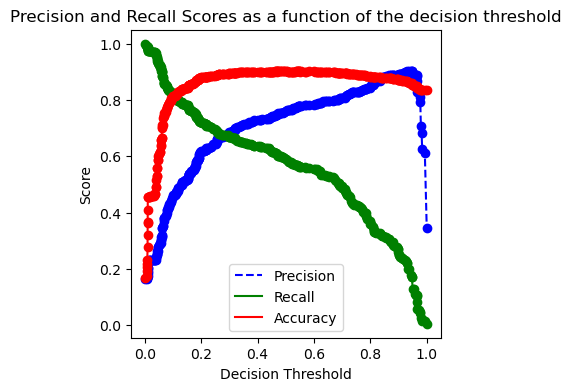

In [32]:
# finding the optimal decision threshold probability to maximize precision
cross_val_ypred = cross_val_predict(model, X_train, y_train, cv = 5, method = 'predict_proba')

p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:,1])
acc = np.ndarray(shape = (len(thresholds),))
i = 0
for th in thresholds:
    y_pred = cross_val_ypred[:,1] > th
    y_pred = y_pred.astype(int)
    acc[i] = accuracy_score(y_pred, y_train)
    i = i + 1
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(4, 4))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, acc, "r-", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

In [33]:
all_thresholds = pd.DataFrame({'thresholds': thresholds, 
                           'precision': p[:-1],
                           'recall': r[:-1],
                           'accuracy': acc})
all_thresholds.sort_values('precision', ascending=False).head(1)

,thresholds,precision,recall,accuracy
347,0.947368,0.90417,0.172449,0.8598


Accuracy:  0.8603031659022262
ROC-AUC:  0.9089531201557569
Precision:  0.9730848861283644
Recall:  0.1590793704518531


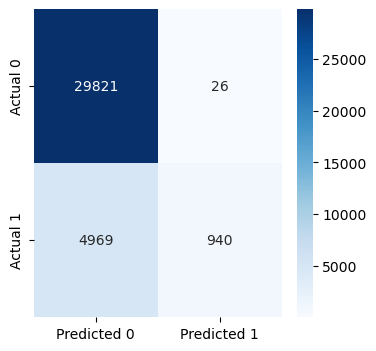

In [34]:
optimal_threshold = all_thresholds.sort_values('precision', ascending=False).loc[347, 'thresholds']

y_pred_prob = model.predict_proba(X_train)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > optimal_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_train))  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_train, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(ax=ax, data=cm, annot=True, cmap='Blues', fmt='g');

Test Accuracy:  0.8562639821029083
Test ROC-AUC:  0.8878818563872182
Test Precision:  0.9148936170212766
Test Recall:  0.14527027027027026


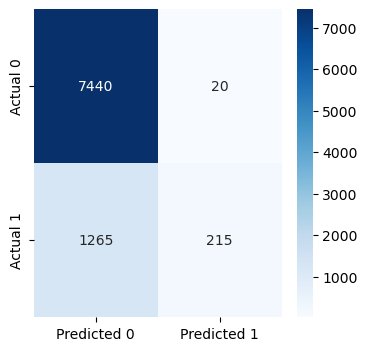

In [35]:
y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > optimal_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Test Accuracy: ",accuracy_score(y_pred, y_test))  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("Test ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Test Precision: ", precision_score(y_test, y_pred))
print("Test Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(ax=ax, data=cm, annot=True, cmap='Blues', fmt='g');

The cross validated training accuracy of the tuned model has stayed about the same, the training recall has decreased by about 43%, and the training precision has improved by about 43% compared to the base model. There were only 20 movies that were predicted to produce revenue and did not with this model.

After finding the optimal hyperparameters using grid searches, I used cost-complexity pruning to find the optimal `ccp_alpha`. Next, I found the optimal decsision threshold probability to maximize precision. When using this decision threshold, this model predicted every observation as 0. In the process of trying to maximize precision, this model became too conservative. Using this cutoff is not useful because main idea of our project is to determine which movies will produce revenue. After choosing the threshold with the highest precision that didn't only predict zeros, the cross validated training precision was about 14% lower than the precision of the model with the tuned hyperparameters. 

I tried one more model where I used a grid search to find the optimal `ccp_alpha` and the optimal hyperparameters simultaneously. After tuning the decision threshold probability with the cross validated training predictions, the training precision was still slightly lower than the training precision of the model with just the tuned hyperparameters. Ultimately, the model with only the tuned hyperparameters had the best performance.

### XGBoost
*By Samuel Sword*

In [ ]:
model = xgb.XGBClassifier().fit(X_train, y_train)

In [ ]:
# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.85

y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

print('Test data performance metrics (with decision threshold of 0.818):')
#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  
#Computing the recall
print("Precision: ", precision_score(y_test, y_pred))

Test data performance metrics (with decision threshold of 0.818):
Accuracy:  88.5234899328859
Precision:  0.8982456140350877


The naive model performs fairly well; however, hyperparameter tuning was done to optimize the model.

In [ ]:
#| warning: false
#randomizedsearch
start_time = time.time()
param_grid = {'n_estimators':[10,100,500],
                'max_depth': [2,4,6,8],
              'learning_rate': [0.01,0.1, 0.3],
               'gamma':[0,10,100,1000],
               'reg_lambda':[0,10,100],
                'scale_pos_weight':[1.25,1.75,2.25]#Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).
             }

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
optimal_params = RandomizedSearchCV(estimator=xgb.XGBClassifier(objective = 'binary:logistic',random_state=1,
                                                         use_label_encoder=False),
                             param_distributions = param_grid,
                             n_iter = 200,
                             scoring = 'accuracy',
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv)
optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_,optimal_params.best_score_)
print("Time taken = ", (time.time()-start_time)/60, " minutes")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


{'scale_pos_weight': 1.25, 'reg_lambda': 100, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.3, 'gamma': 0} 0.9068128681178177
Time taken =  7.520998700459798  minutes


Note: after the tuning above, some further grid searches, along with manual tuning of learning rate and n_estimators was done, in which the following parameters were found:

In [41]:
import xgboost as xgb
model = xgb.XGBClassifier(gamma= 0, learning_rate=0.25, max_depth=6, n_estimators= 150, reg_lambda=100, scale_pos_weight=1).fit(X_train, y_train)

In [ ]:
# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.849

y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

print('Test data performance metrics:')
#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  
#Computing the recall
print("Precision: ", precision_score(y_test, y_pred))

Test data performance metrics:
Accuracy:  88.87024608501119
Precision:  0.9307282415630551


#### LassoCV model

Naive model:

In [38]:
model = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train, y_train)

In [ ]:
# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.793
y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

print('Test data performance metrics:')
#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  
#Computing the recall
print("Precision: ", precision_score(y_test, y_pred))

Test data performance metrics:
Accuracy:  88.46756152125279
Precision:  0.8931698774080561


Tuning of the hyperparameter C yielded minimal success:

In [39]:
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1).fit(X_train, y_train)

In [ ]:
print('Test data performance metrics:')
#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  
#Computing the recall
print("Precision: ", precision_score(y_test, y_pred))

Test data performance metrics:
Accuracy:  88.46756152125279
Precision:  0.8945518453427065


## Model Ensemble 

### Voting ensemble

In [43]:
#hard voting
predictions = pd.DataFrame({'Decision Tree': y_pred_DT, 'XGBoost': y_pred_XGB, 'ADABoost': y_pred_ADA, 'Random Forest':y_pred_RF, 'Lasso': y_pred_lasso})
predictions['majority'] = predictions['Decision Tree'] + predictions.XGBoost + predictions.ADABoost + predictions['Random Forest'] + predictions['Lasso']

In [ ]:
majority_predictions = []
for x in predictions.majority:
    if x > 2:
        majority_predictions.append(1)
    if x <= 2:
        majority_predictions.append(0)

In [ ]:
print('Test data performance metrics of ensemble:')
print('Accuracy:', accuracy_score(y_test, majority_predictions))
print('Precision:', precision_score(y_test, majority_predictions))

Test data performance metrics of ensemble:
Accuracy:  87.88590604026845
Precision:  0.93058568329718


### Stacking ensemble
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

## Limitations of the model with regard to prediction

While our team did find great success optimizing for our performance metrics (accuracy and precision), with more time or resources, we believe there is potential for each of our individual models to be better tuned to the input data. While we did utilize EDA, with more time, we could cater specific EDA to each of our models (i.e which predictors are best for XGBoost, Random Forest, etc...) and likely better prepare our data for our models. Additionally, with more time, we could allocate more resources to tuning the models and ensure we are utilizing the best hyperparameters available.  

In terms of convenience, all of our stakeholders (movie studios, actors/actresses, and screenwriters) should have easy access to the relevant predictors in our model as each party has access to a movie's script. With our model, as soon as a script is finalized with runtime, language, and the related, our stakeholders should be able to predict whether the movie script they are analyzing will be profitable or not.  

Inherently, when discussing a movie's profitability, there is always a consideration for popular culture of the time and what is profitable during a breadth of years. With changes to popular culture and what audiences want, our model will need to be retrained on more representative data. This limiation is constant as we cannot predict what external changes will occur and their impact on movie viewing; thus, our current will become obselete once a cultural shift occurs in movie viewing and popularity. Hopefully, by retraining our model on newer data, our model can continue to be relevant through these cultural shifts.  

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Based on our models, we have found that our relevant predictors are both greatly accurate, and precise, in their ability to determine whether a movie will be profitable or not. To our stakeholders, we yield a few recommendations.  
1. A higher budget leads to profit: From our models, the most important feature for predicting whether a movie would be profitable or not was its budget. While it may seem obvious, pouring more money into a movie that our stakeholders think have the ability to succeed ultimately does increase its probability of finding a profit.  
2. Genres have little importance: While there is slight notable difference between the genres, notably, no genre has a significantly higher chance of making a movie profitable. For movie studios, any genre can be profitable depending on other aspects of the movie. For actors, being flexible in roles is still valuable as every genre can thrive. To screenwriters, any type of story can succeed.  
While not immediately implementable, our model has shown success in its ability to predict a movie's profit and we would recommend its utilization to all of our stakeholders. As a note, our model is limited to the data it is trained upon and the current trends of movies / popular culture. Our model has the ability to adapt to new trends; however, it must be trained upon up-to date data so that it will be able to properly capture current trend.  

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Elijah Nacar</td>
    <td>RandomForestClassifier</td>
    <td>Data Search and Performance Metrics</td>    
    <td>Searched for data sources and determined performance metrics</td>
  </tr>
  <tr>
    <td>Jack McNally</td>
    <td>AdaBoost</td>
    <td>Variable selection</td>    
    <td>Variable selection based on feature importance</td>
  </tr>
    <tr>
    <td>Tess Wagner</td>
    <td>Decision Tree</td>
    <td>Data Cleaning, EDA, Ensembling</td>    
    <td>Transformed response/predictors, Created tables/plots of variable distributions, Stacking Ensemble</td>
  </tr>
    <tr>
    <td>Sam Sword</td>
    <td>XGBoost and Lasso</td>
    <td>Ensembling</td>    
    <td>Voting ensemble</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3
